In [2]:
import csv
from typing import Optional,Any
import random
import arrow
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import Sequential
#from keras.src.layers import LSTM, Dropout, Dense
from pandas import DatetimeIndex
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# 可视化结果（如果需要）
import matplotlib.pyplot as plt
import os
import pathlib
import xml.etree.ElementTree as ET
import xarray as xr
import codecs
import datetime

# 先从海浪数据中提取出经纬度，时间，风，海浪高度
# 解析单个文件，并存于字典内
from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sys

In [3]:
rmse_model_fit=pd.read_csv(r'Z:\03TRAINNING_EVALUATION_DATA\rmse_forecast_250609.csv')
rmse_source=pd.read_csv(r'Z:\03TRAINNING_EVALUATION_DATA\rmse_forecast_source_250609.csv')

In [4]:
# 计算原始数据的RMSE均值
def calculate_rmse_mean(rmse_source: pd.DataFrame) -> float:
    """
    计算原始数据的RMSE均值
    :param rmse_source: 包含RMSE数据的DataFrame
    :return: RMSE均值
    """
    rmse_mean = rmse_source['RMSE'].mean()
    return rmse_mean

In [6]:
source_model_mean = calculate_rmse_mean(rmse_source)

In [8]:
model_fit_mean = calculate_rmse_mean(rmse_model_fit)

In [10]:
print(f"Source Model RMSE Mean: {source_model_mean}")
print(f"Model Fit RMSE Mean: {model_fit_mean}")

Source Model RMSE Mean: 3.2468551472830405
Model Fit RMSE Mean: 1.9256438809421774


In [12]:
(source_model_mean-model_fit_mean)/ source_model_mean
# 计算模型拟合的RMSE均值与原始数据RMSE均值的比率

0.4069202986916275

In [13]:
len(rmse_model_fit),len(rmse_source)

(61, 72)

In [15]:
source_model_mean_24= calculate_rmse_mean(rmse_source[:8])
model_fit_mean_24 = calculate_rmse_mean(rmse_model_fit[:8])
(source_model_mean_24-model_fit_mean_24)/ source_model_mean_24

0.10199991543337318

In [16]:
source_model_mean_48= calculate_rmse_mean(rmse_source[8:16])
model_fit_mean_48 = calculate_rmse_mean(rmse_model_fit[8:16])
(source_model_mean_48-model_fit_mean_48)/ source_model_mean_48

0.26690654870705877

In [17]:
source_model_mean_72= calculate_rmse_mean(rmse_source[16:24])
model_fit_mean_72 = calculate_rmse_mean(rmse_model_fit[16:24])
(source_model_mean_72-model_fit_mean_72)/ source_model_mean_72

0.3716941225867269

In [5]:
series_model_fit = pd.Series(rmse_model_fit['RMSE'])
series_SOURCE = pd.Series(rmse_source['RMSE'])

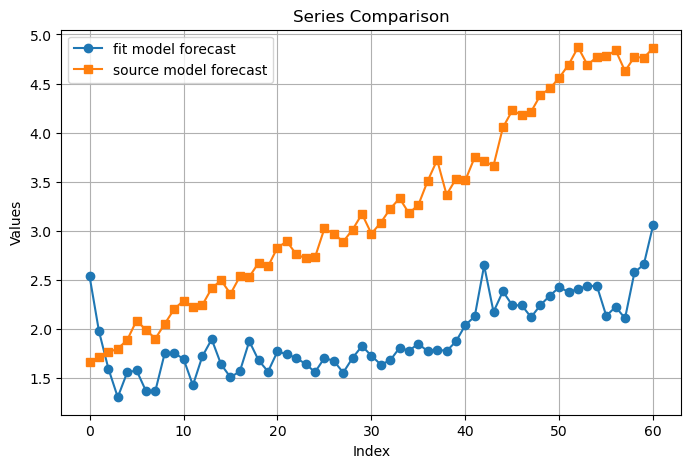

In [10]:
# 创建图表
plt.figure(figsize=(8, 5))  # 设置图像大小
plt.plot(series_model_fit, label="fit model forecast", marker='o')  # 绘制第一条线
plt.plot(series_SOURCE, label="source model forecast", marker='s')  # 绘制第二条线

# 添加标题和标签
plt.title("Series Comparison")
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()  # 显示图例
plt.grid()  # 添加网格线

# 显示图表
plt.show()